# Pokemon com estatisticas 

Este conjunto de dados inclui 721 Pokémon, incluindo seu número, nome, primeiro e segundo tipo e estatísticas básicas: HP, Ataque, Defesa, Ataque Especial, Defesa Especial e Velocidade. Tem sido de grande utilidade no ensino de estatística para crianças. Com certos tipos, você também pode dar uma introdução geek ao aprendizado de máquina.

O dataset não possui uma variavel alvo bem definida para ser prevista, entao, foi decidido vamos tentar prever os pontos de defesa conforme os seus pontos de ataque, resultando em uma REGRESSÃO LINEAR SIMPLES

The data as described by Myles O'Neill is:

#: ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

## Por que esse dataset? 

Simples, porque eu sou apaixonado pela franquia pokemon, joguei alguns jogos e assisti muito as temporadas classicas quando passava na redeTV, achei esse dataset por acaso entao vi uma otima oportunidade para analisa-lo

### Leitura de dados com pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Lendo o arquivo
df = pd.read_csv('Pokemon.csv')

In [3]:
# Ver as tres primeiras linhas 
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
df = df.drop(['#'], axis=1)

In [5]:
# Verificando valores nulos nas colunas 
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
df.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [7]:
# Preenchendo valores nulos com 0
df['Type 2'].fillna('Not Available', inplace = True)

In [8]:
# Verificando novamente se ha valores nulo 
df.isna().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [9]:
# Vendo quantos valores unicos ha em cada coluna 
print(df.nunique())

Name          800
Type 1         18
Type 2         19
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64


### Descritivo e exploração de dados com pandas (groupbys)

In [10]:
# Observando as médias estatisticas de cada tipo principal de pokemon
df.groupby('Type 1').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [11]:
# Comparando as estatisticas média dos pokemons lendarios com os não-lendarios 
df.groupby('Legendary').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Legendary,,,,,,,,
False,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
True,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231


In [12]:
# Vamos ver qual geração tem as melhores estatisticas 
df.groupby('Generation').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,
1,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,0.036145
2,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321,0.047170
3,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,0.112500
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,0.107438
5,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,0.090909
6,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024,0.097561


 Olhar numeros e ficar comparando é uma coisa chata, entao vamos colocar isso em formato gráfico

### Análise Exploratória e Figuras que mostrem insights sobre os dados com pandas, seaborn e matplotlib

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_palette('pastel')

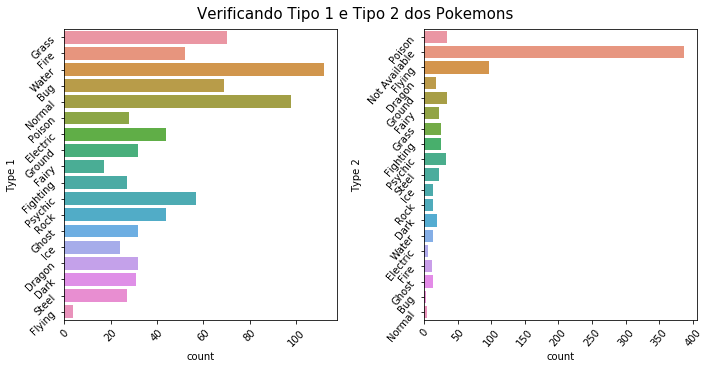

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Verificando Tipo 1 e Tipo 2 dos Pokemons', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 45)
sns.countplot(y = df['Type 1'], 
             ax = ax[0])

ax[1].tick_params(labelrotation = 50)
sns.countplot(y = df['Type 2'],
             ax = ax[1])

fig.tight_layout(pad = 1.2)

Os tipos de pokemons mais registrados nesse dataset são do tipo agua e tipo normal, e a sua minoria é do tipo vôo e fada

A imensa maioria dos pokemons nao tem um segundo tipo, mas uma boa quantidade tem o tipo secundario como vôo e psicico

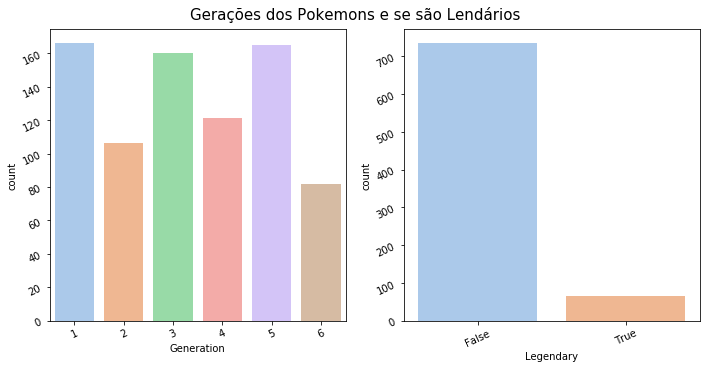

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Gerações dos Pokemons e se são Lendários', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.countplot(x = df['Generation'], 
             ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.countplot(x = df['Legendary'],
             ax = ax[1])

fig.tight_layout(pad = 1.2)

As gerações 1, 3, 5 são as que mais contem pokemons nesse conjunto de dados

E para a surpresa de 0 pessoas, a minoria dos pokemons sao lendarios 

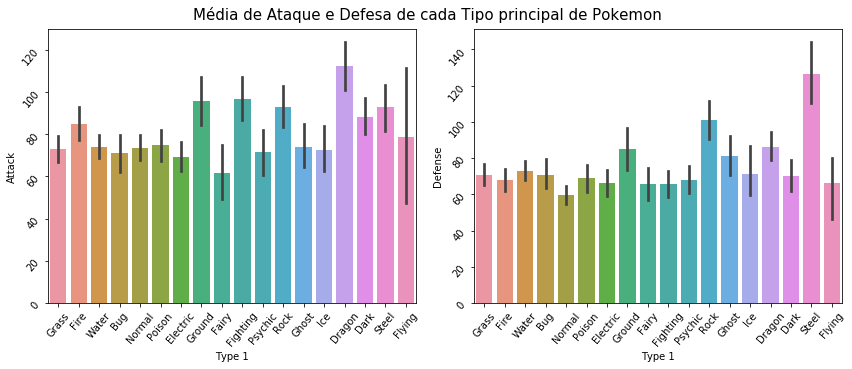

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('Média de Ataque e Defesa de cada Tipo principal de Pokemon', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Attack',
             data= df, ax = ax[0])


ax[1].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Defense',
             data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Em relação ao ataque, foi observados que pokemons do tipo DRAGÃO tem a maior média em relação ao seu atributo ofensivo e do outro lado, as FADAS em média sao as mais fracas ofensivamente 

Em relação a defesa, os pokemons to tipo AÇO lideram essa estatistica com uma certa folga, em seguida aparecem os pokemons do tipo ROCHA/PEDRA e os pokemons do tipo NORMAL são os mais fracos 

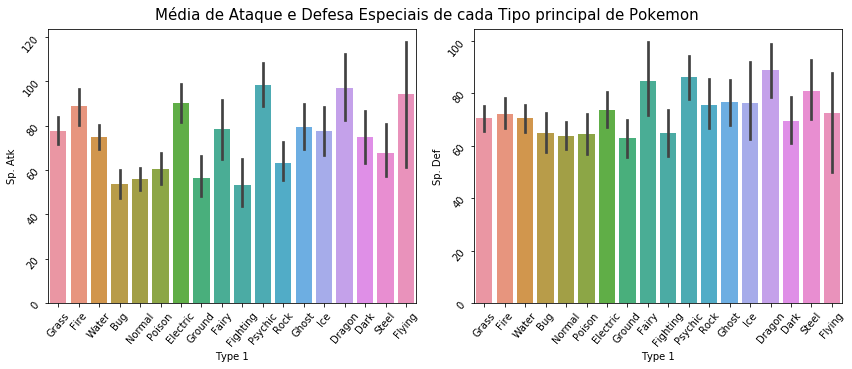

In [17]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('Média de Ataque e Defesa Especiais de cada Tipo principal de Pokemon', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Sp. Atk',
             data= df, ax = ax[0])


ax[1].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Sp. Def',
             data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Os tipos voador, dragão e psiquico sao os que possuem maior média de pontos de ataques especiais 

Em relaçao a defesa especial, os dragões estao nas cabeças novamente, mas nao muito distante estao os psiquicos e fadas

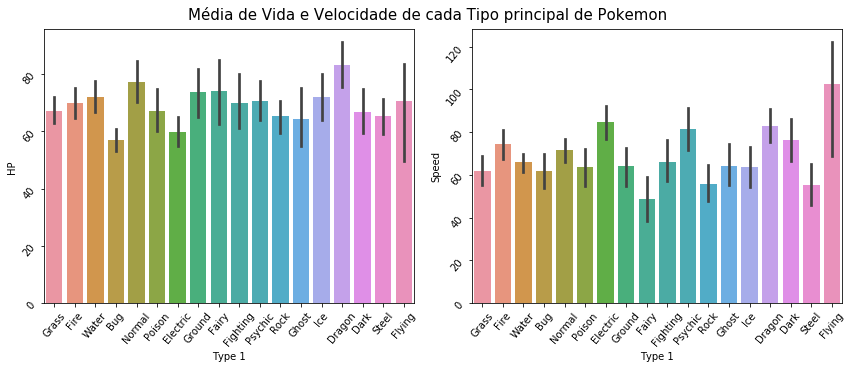

In [18]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('Média de Vida e Velocidade de cada Tipo principal de Pokemon', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'HP',
             data= df, ax = ax[0])


ax[1].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Speed',
             data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

E pra nao perder o costume, o tipo dragao novamente esta na liderança de alguma estatistica e dessa vez é nos pontos de vida e sao seguidos pelos tipos normais 

Em relaçao a velocidade, o tipo voador é quem lidera de forma disparada essa estatistica

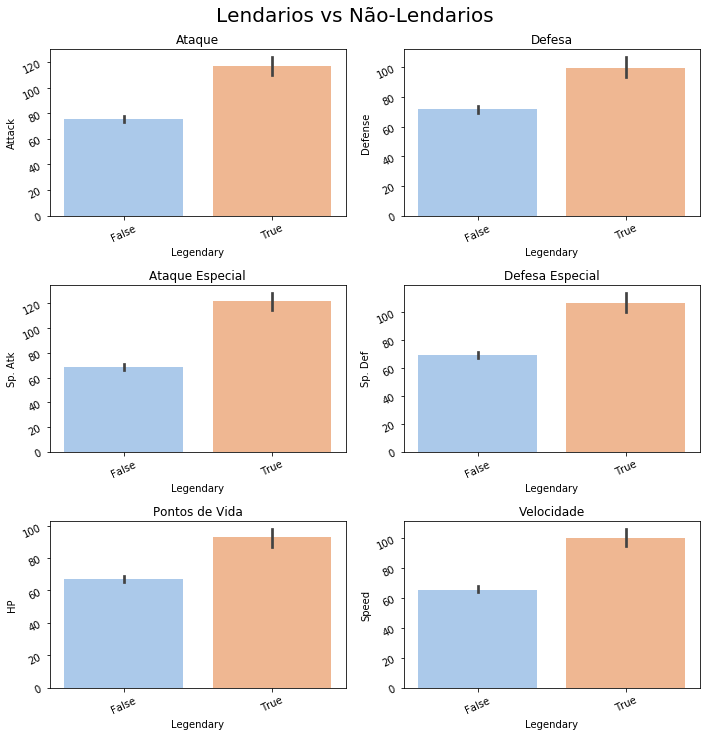

In [19]:
fig, ax = plt.subplots(3, 2, figsize = (10,10))
fig.suptitle('Lendarios vs Não-Lendarios', y = 1.02, fontsize = 20)

ax[0][0].tick_params(labelrotation = 25)
ax[0][0].set_title('Ataque')
sns.barplot(x = 'Legendary', y = 'Attack',
            data= df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
ax[0][1].set_title('Defesa')
sns.barplot(x = 'Legendary', y = 'Defense',
                data= df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
ax[1][0].set_title('Ataque Especial')
sns.barplot(x = 'Legendary', y = 'Sp. Atk',
                data= df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
ax[1][1].set_title('Defesa Especial')
sns.barplot(x = 'Legendary', y = 'Sp. Def',
                data= df, ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
ax[2][0].set_title('Pontos de Vida')
sns.barplot(x = 'Legendary', y = 'HP',
                data= df, ax = ax[2][0])

ax[2][1].tick_params(labelrotation = 25)
ax[2][1].set_title('Velocidade')
sns.barplot(x = 'Legendary', y = 'Speed',
                data= df, ax = ax[2][1])

fig.tight_layout(pad = 1.2)

E sempre nenhum tipo de surpresa, os pokemons lendarios mostram porque sao os mais raros

Voce deve ta se perguntando: "Pablo, porque voce nao fez a mesma coisa quando o eixo X era o Tipo 1 dos pokemons?", e eu respondo, eu nao fiz tal ato pois em cada grafico tinha uma informação diferente a ser comentada, entao para cada dupla de graficos, foi extraido uma informaçao diferente. Agora em relaçao ao lendarios, quando fizemos o "groupby", por ter poucos numeros, deu pra ver claramente que eles liderariam todas as estatisticas

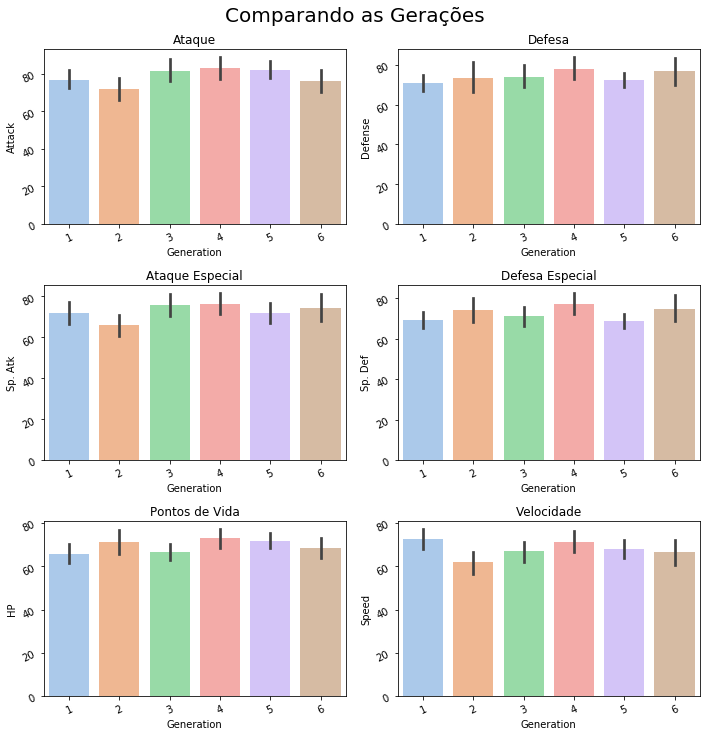

In [20]:
fig, ax = plt.subplots(3, 2, figsize = (10,10))
fig.suptitle('Comparando as Gerações', y = 1.02, fontsize = 20)

ax[0][0].tick_params(labelrotation = 25)
ax[0][0].set_title('Ataque')
sns.barplot(x = 'Generation', y = 'Attack',
            data= df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
ax[0][1].set_title('Defesa')
sns.barplot(x = 'Generation', y = 'Defense',
                data= df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
ax[1][0].set_title('Ataque Especial')
sns.barplot(x = 'Generation', y = 'Sp. Atk',
                data= df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
ax[1][1].set_title('Defesa Especial')
sns.barplot(x = 'Generation', y = 'Sp. Def',
                data= df, ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
ax[2][0].set_title('Pontos de Vida')
sns.barplot(x = 'Generation', y = 'HP',
                data= df, ax = ax[2][0])

ax[2][1].tick_params(labelrotation = 25)
ax[2][1].set_title('Velocidade')
sns.barplot(x = 'Generation', y = 'Speed',
                data= df, ax = ax[2][1])

fig.tight_layout(pad = 1.2)

Ha um bom equilibrio em todas as estatisticas entre as geraçoes, mas a geração 4 se mostra mais forte, pois lidera a média de HP, ataque, defesa, ataque e defesa especiais, so perdendo na velocidade

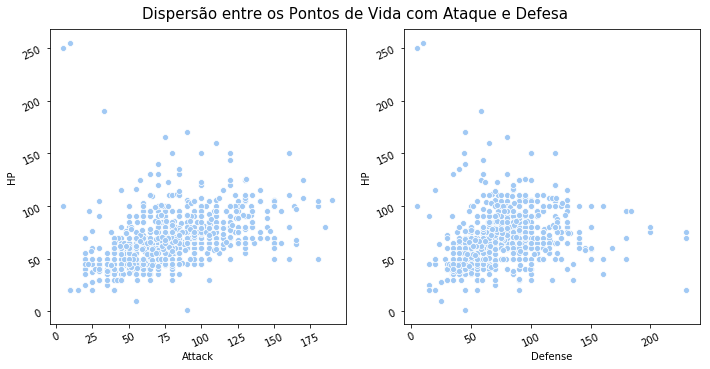

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Dispersão entre os Pontos de Vida com Ataque e Defesa', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Podemos ver nos dois graficos que conforme o ataque ou defesa aumenta, a vida tem uma tendência a aumentar tambem mas podemos observar que os pokemons com maiores pontos de defesa, tem uma quantidade relativamente baixa de vida

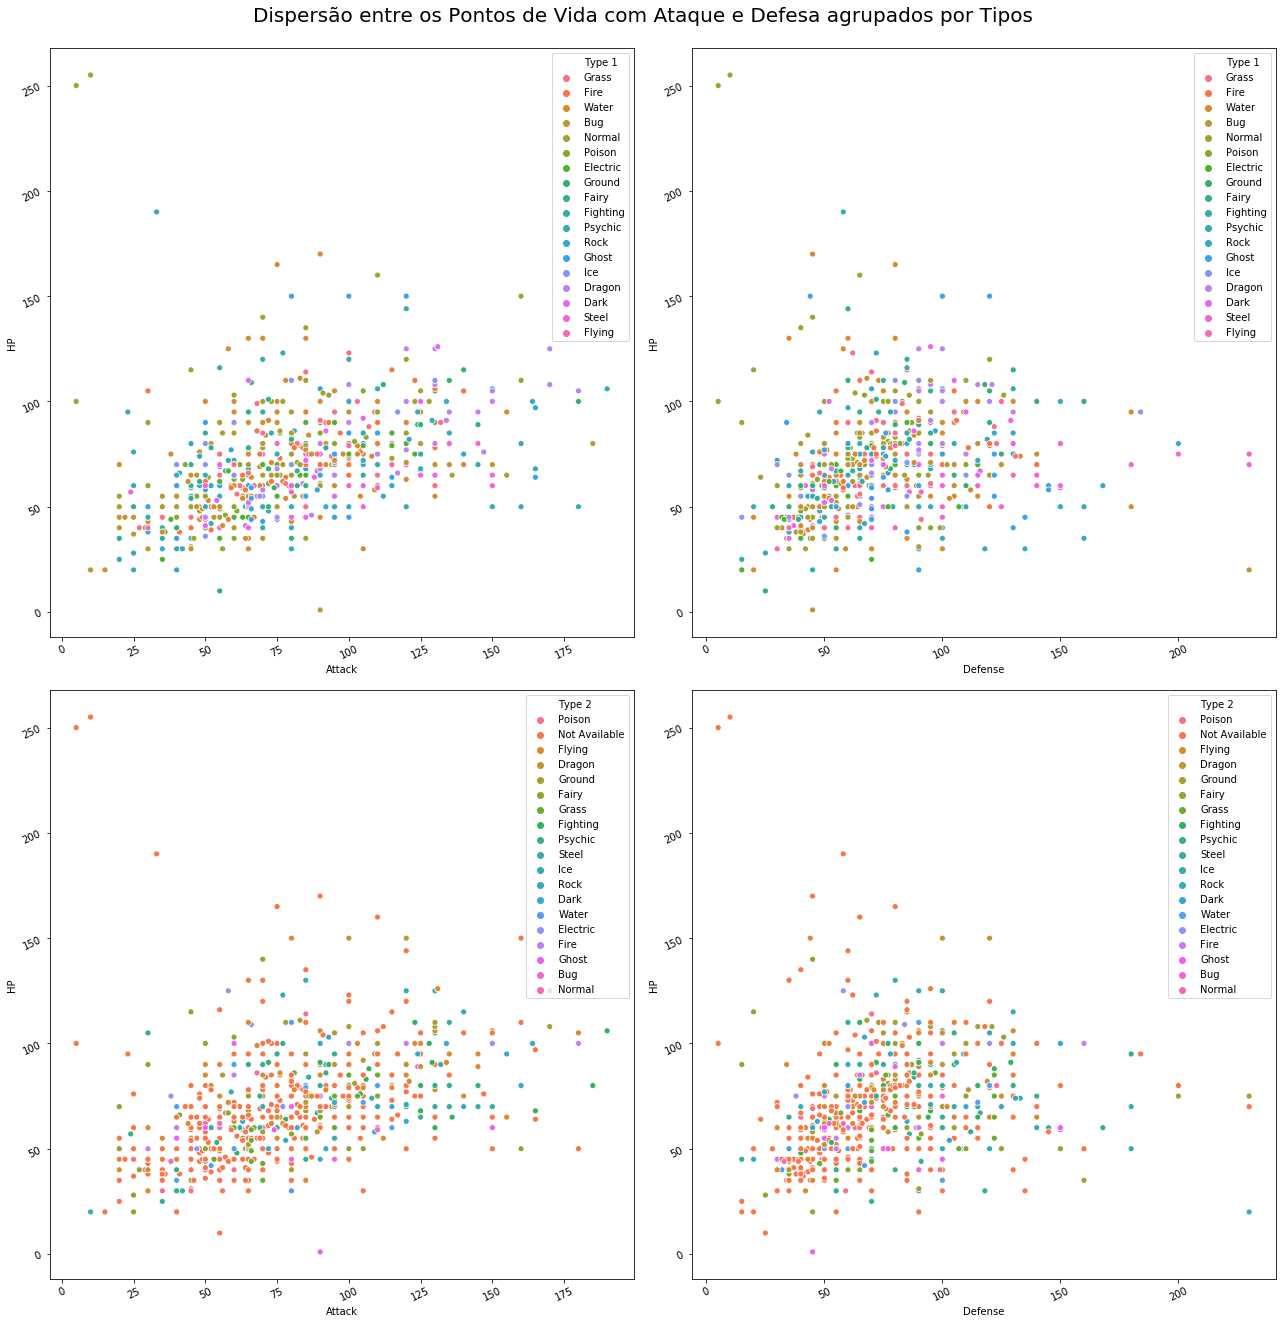

In [22]:
fig, ax = plt.subplots(2, 2, figsize = (18,18))
fig.suptitle('Dispersão entre os Pontos de Vida com Ataque e Defesa agrupados por Tipos', y = 1.02, fontsize = 20)

ax[0][0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                hue = 'Type 1',
                data= df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                hue = 'Type 1',
                data= df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                hue = 'Type 2',
                data= df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                hue = 'Type 2',
                data= df, ax = ax[1][1])

fig.tight_layout(pad = 1.2)

Podemos observar que independente do tipo (seja 1 ou 2) do pokemon, eles estão bem equilibrados mas vemos no grafico 1,1 que os pokemons com mais vida, tem baixissimos pontos de ataque e que sao do tipo normal

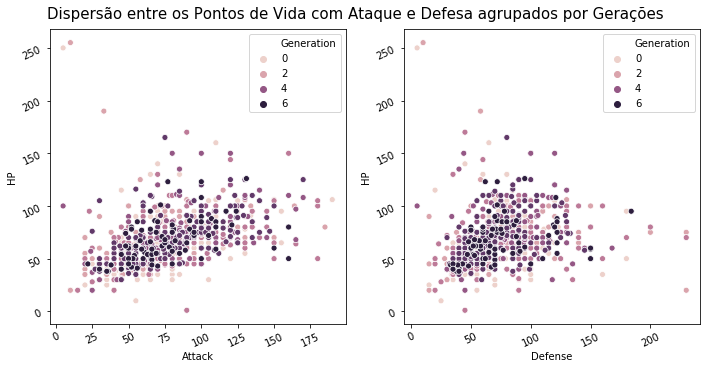

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Dispersão entre os Pontos de Vida com Ataque e Defesa agrupados por Gerações', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                hue = 'Generation',
                data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                hue = 'Generation',
                data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Pokemons de Geraçoes 1 a 3 tem maior probabilidade de passar os 100 pontos de vida e 150 de ataque, em relação a defesa, praticamente todos estão próximos da faixa 50-100 e os que passam dessa faixa em sua maioria sao pokemons de geração 1 a 3

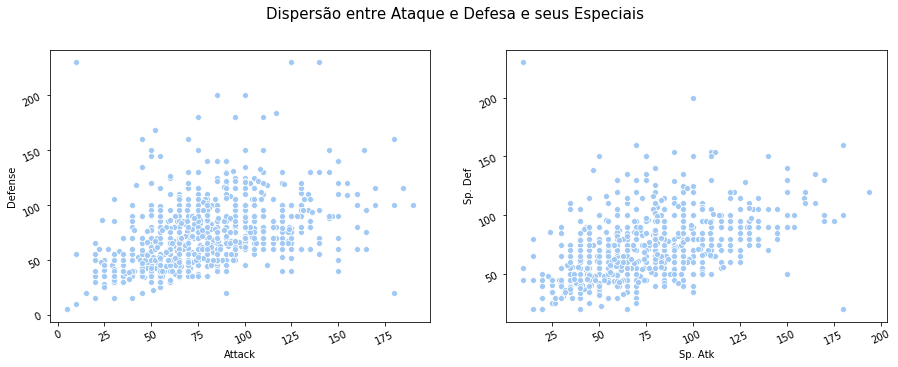

In [24]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Dispersão entre Ataque e Defesa e seus Especiais', y = 1, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'Defense', 
                data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Sp. Atk', y = 'Sp. Def',
                data= df, ax = ax[1])

Podemos observar que conforme os pontos de ataque (especiais ou não) sobem, os de defensa tendem a subir também

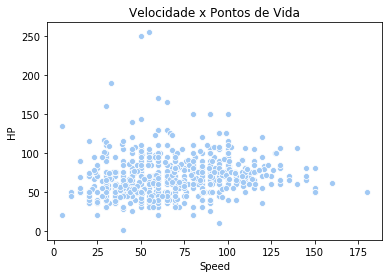

In [25]:
plt.title('Velocidade x Pontos de Vida')
sns.scatterplot(x = 'Speed', y = 'HP',
                data= df)

Vemos que nao é ha uma forte correlação de quanto maior a velocidade, maior a vida, vemos que os pokemons com maior quandidade de vida, tem velocidade mediana

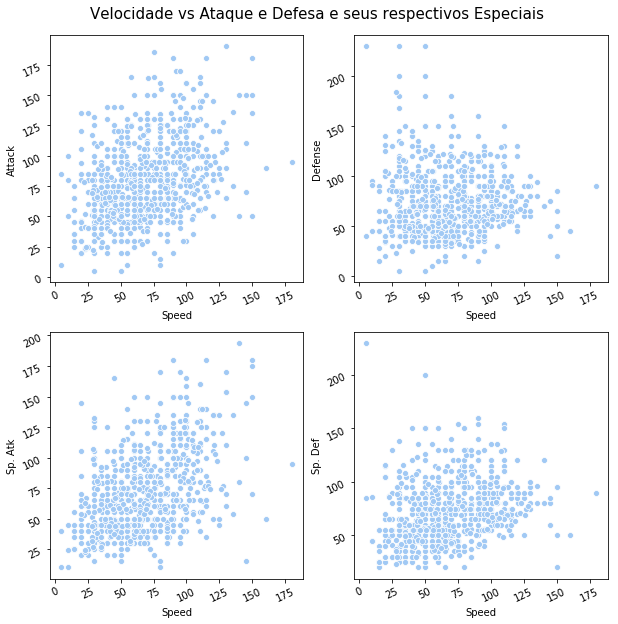

In [26]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
fig.suptitle('Velocidade vs Ataque e Defesa e seus respectivos Especiais ',y = 0.92, fontsize = 15)

ax[0][0].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Attack',
                data = df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Defense',
                data = df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Sp. Atk',
                data = df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Sp. Def',
                data = df, ax = ax[1][1])

Observamos que a velocidade esta bem correlacionada com o ataque, a medida que a velocidade da maioria dos pokemons aumenta, sua força de ataque tambem aumenta, nao podemos dizer com tanta firmeza em relação a defesa, conforme sua velocidade aumenta, seu poder de defesa aumenta um pouco

In [27]:
# Calculando a media da nossa variavel target
MeanDefense = df.Defense.mean()
MeanDefense

73.8425

In [28]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(MeanDefense - df['Defense'])**2 
SSE = np.sum(squared_errors)
print ('A Soma dos Quadrados dos Erros (SSE) é igual a %01.f' % SSE)

A Soma dos Quadrados dos Erros (SSE) é igual a 776956


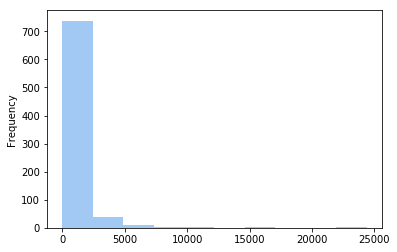

In [29]:
squared_errors.plot('hist')

Temos mais erros "pequenos", ou seja, mais valores próximos à média.

Para Regressão Linear Simples usaremos como variável explanatória a variável RM que representa o número médio de quartos nas casas.

In [30]:
print('O Desvio Padrão do nosso alvo é: ', np.std(df['Defense']))

O Desvio Padrão do nosso alvo é:  31.164004777146335


In [31]:
# Vamos ver a correlação entre Defesa e Ataque usando o scipy
from scipy.stats.stats import pearsonr

In [32]:
print ('Correlação entre Defesa e Ataque é %0.5f' % pearsonr(df['Attack'], df['Defense'])[0])

Correlação entre Defesa e Ataque é 0.43869


In [33]:
# Definindo o range de valores de X e y
XRange = [df['Attack'].min(), df['Attack'].max()]
yRange = [df['Defense'].min(), df['Defense'].max()]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


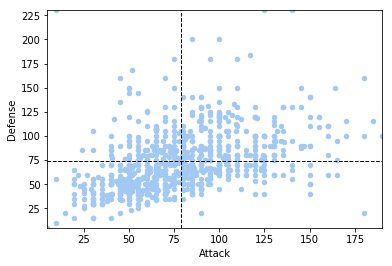

In [34]:
scatterPlot = df.plot(kind = 'scatter', x = 'Attack', y = 'Defense', xlim = XRange, ylim = yRange)

# Calculando a média
meanY = scatterPlot.plot(XRange, [df['Defense'].mean(),df['Defense'].mean()], '--', color = 'black', linewidth = 1)
meanX = scatterPlot.plot([df['Attack'].mean(), df['Attack'].mean()], yRange, '--', color = 'black', linewidth = 1)

### Quebrar os dados em conjunto de treino e conjunto de teste

In [35]:
from sklearn.model_selection import train_test_split

In [47]:
# Define os valores de x e y
num_observ = len(df)
X = df['Attack'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = df['Defense'].values # y pode ser um vetor

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [50]:
X

array([[ 49],
       [ 62],
       [ 82],
       [100],
       [ 52],
       [ 64],
       [ 84],
       [130],
       [104],
       [ 48],
       [ 63],
       [ 83],
       [103],
       [ 30],
       [ 20],
       [ 45],
       [ 35],
       [ 25],
       [ 90],
       [150],
       [ 45],
       [ 60],
       [ 80],
       [ 80],
       [ 56],
       [ 81],
       [ 60],
       [ 90],
       [ 60],
       [ 85],
       [ 55],
       [ 90],
       [ 75],
       [100],
       [ 47],
       [ 62],
       [ 92],
       [ 57],
       [ 72],
       [102],
       [ 45],
       [ 70],
       [ 41],
       [ 76],
       [ 45],
       [ 70],
       [ 45],
       [ 80],
       [ 50],
       [ 65],
       [ 80],
       [ 70],
       [ 95],
       [ 55],
       [ 65],
       [ 55],
       [ 80],
       [ 45],
       [ 70],
       [ 52],
       [ 82],
       [ 80],
       [105],
       [ 70],
       [110],
       [ 50],
       [ 65],
       [ 95],
       [ 20],
       [ 35],
       [ 50],
      

In [51]:
y

array([ 49,  63,  83, 123,  43,  58,  78, 111,  78,  65,  80, 100, 120,
        35,  55,  50,  30,  50,  40,  40,  40,  55,  75,  80,  35,  60,
        30,  65,  44,  69,  40,  55,  85, 110,  52,  67,  87,  40,  57,
        77,  48,  73,  40,  75,  20,  45,  35,  70,  55,  70,  85,  55,
        80,  50,  60,  25,  50,  35,  60,  48,  78,  35,  60,  45,  80,
        40,  65,  95,  15,  30,  45,  65,  50,  70,  80,  35,  50,  65,
        35,  65, 100, 115, 130,  55,  70,  65, 110, 180,  70,  95,  55,
        45,  70,  55,  80,  50,  75, 100, 180,  30,  45,  60,  80, 160,
        45,  70,  90, 115,  50,  70,  80,  85,  95, 110,  53,  79,  75,
        95, 120,  95, 120,   5, 115,  80, 100,  70,  95,  60,  65,  55,
        85,  65,  80,  35,  57,  57, 100, 120,  95,  55,  79, 109,  80,
        48,  50,  60,  60,  60,  70, 100, 125,  90, 105,  65,  85,  65,
       100,  85,  90,  45,  65,  95,  90, 100,  70, 100,  65,  80, 100,
        43,  58,  78,  64,  80, 100,  34,  64,  30,  50,  30,  5

In [52]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (560, 1)
Tamanho de X_test:  (240, 1)
Tamanho de y_train:  (560,)
Tamanho de y_test:  (240,)


### Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
modelo = LinearRegression()

In [53]:
modelo_treinado = modelo.fit(X_train, y_train)

### Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [54]:
# Imprimindo os coeficientes
print (modelo_treinado.coef_)
print (modelo_treinado.intercept_)

[0.41713657]
41.35879322670772


In [55]:
# Agora vamos imprimir as previsoes 
print(modelo_treinado.predict(X_test))

[ 65.96985105  77.23253853  68.47267049  89.32949916  72.64403623
  83.07245056  73.89544595  73.47830937  64.71844133  93.50086489
  62.21562189  74.72971909  61.38134875  64.30130476  62.21562189
  60.12993903  53.87289043  61.38134875  78.90108483  74.72971909
  76.81540196  70.55835336  84.74099685  75.56399224  83.07245056
  62.21562189 112.27201069  80.98676769  67.63839735  66.38698763
  72.64403623  93.50086489  58.04425616  62.21562189  70.55835336
  94.75227461  85.15813343  70.55835336  73.0611728   64.30130476
  55.95857329  60.12993903  70.55835336  73.47830937 110.18632782
  72.64403623  83.07245056  53.87289043  89.32949916  68.47267049
  74.72971909  85.15813343  87.24381629  85.99240657  64.30130476
  70.55835336  68.47267049  64.30130476  71.39262651  63.04989504
  83.07245056  76.81540196  62.21562189  64.30130476  67.22126077
  70.55835336  93.50086489  70.55835336  64.30130476  72.64403623
  75.56399224  58.04425616  64.30130476  85.15813343  76.81540196
  66.38698

In [58]:
# Agora vamos fazer uma previsao com valor diferente

Attack = 57
# Xp = np.array(RM)
Xp = np.array(Attack).reshape(-1, 1)
print ("Quando os Pontos de Ataque são %01.f, nosso modelo prevê que a força de Defesa será %0.1f" % (Attack, modelo_treinado.predict(Xp)))

Quando os Pontos de Ataque são 57, nosso modelo prevê que a força de Defesa será 65.1
